# Field trials data in Grassroots

### [https://grassroots.tools/fieldtrial](https://grassroots.tools/fieldtrial)

<div>
<a href="https://grassroots.tools/fieldtrial"> 
<img src="./images/field_trial_web.png" width="830" class="center"/>
    </a>
</div>





# Field trials data in Grassroots

Each study has a unique ID in the system (e.g., __603e3e9502700f7faf25dfb4__)

<div><a href="https://grassroots.tools/fieldtrial/plots/603e3e9502700f7faf25dfb4"><img src="./images/study_ID.png" width="890" class="center"/></a></div> 


[https://grassroots.tools/fieldtrial/study/603e3e9502700f7faf25dfb4](https://grassroots.tools/fieldtrial/plots/603e3e9502700f7faf25dfb4) 



# Field trials data in Grassroots
<br>
<br>
The studies that  submitted the observations measured on each plot of the experiment have a dedicated plot page.

[https://grassroots.tools/fieldtrial/plot/03e3e9502700f7faf25dfb4](https://grassroots.tools/fieldtrial/plots/603e3e9502700f7faf25dfb4) 


These are the studies that provide the best opportunity for  analysing or visualisations. 

# Field trials data in Grassroots
<br>
The data is displayed in a table organised by rows and columns of the individual plots in the experiment.

<div><a href="https://grassroots.tools/fieldtrial/plots/603e3e9502700f7faf25dfb4"><img src="./images/table_WGIN_2019.png" width="850" class="center"/></a></div> 


# Field trials data in Grassroots
<br>
The data is displayed in a table organised by rows and columns of the individual plots in the experiment.

<div><a href="https://grassroots.tools/fieldtrial/plots/603e3e9502700f7faf25dfb4"><img src="./images/check_table.png" width="800" class="center"/></a></div> (row 6, column 3)

### What if you want to manipulate the data of a study in your own way?

## How to get the plot data directly to your machine and play with it.

The only thing you need to know is how to make requests to the grassroots server using the id of the study of interest.

There are 3 main elements in a study file.

1. General description of the study.
2. Description of each phenotype observed in the study.
3. Plot data organised in by rows and columns.

All the data is handled in the JSON format.


In [1]:
import json        # JSON library. JSON format stores data using pairs of keys and values
import requests    # HTTP library
#server_url = "http://localhost:2000/grassroots/public_backend"
server_url = "https://grassroots.tools/public_backend"

#Request to backend server to get a study using unique ID.
def get_plot(id):
    plot_request = {"services": [{
                    "so:name": "Search Field Trials",
                    "start_service": True,
                    "parameter_set": { "level": "advanced",
                    "parameters": [{"param": "ST Id","current_value": id}, 
                                   {"param": "Get all Plots for Study","current_value": True}, 
                                   {"param": "ST Search Studies", "current_value": True}]}
                                  }]}
    res = requests.post(server_url, data=json.dumps(plot_request))
    return json.dumps(res.json())
#----------------------------------------------------------------------------------
json_study   = get_plot("603e3e9502700f7faf25dfb4")    #  Rothamsted Harvest 2019
#json_study   = get_plot("608be34702700f129912adbf")   #   JIC
single_study = json.loads(json_study) # "Deserialising" data (transform it into Python structures)

##-- 1)Basic info about study
print("Studyt name: ", single_study['results'][0]['results'][0]['data']['so:name'])    
print("Description: ", single_study['results'][0]['results'][0]['data']['so:description'])    


Studyt name:  WGIN Diversity Rothamsted Harvest 2019
Description:  Wheat variety, N, pesticide interaction trial


In [2]:
import nbimporter
from src.grassroots_requests import get_plot
from src.grassroots_plots    import print_phenotype_traits
json_study   = get_plot("603e3e9502700f7faf25dfb4") # WGIN Diversity Rothamsted Harvest 2019 

print_phenotype_traits(json_study)   #Variable name, trait and unit.

1) HI_CalcGbSamp_%:  (Harvest index)   Units: % 
2) SpkPop_CalcGbSamp_m2:  (Spike population per unit area)   Units: m2 
3) WtGrSp_CalcGbSamp_g:  (Weight of grain per spike)   Units: g 
4) TGrUa_CalcFh_m2:  (Thousand grains per unit area)   Units: /m2 
5) GrNoSp_CalcGbSamp_No:  (Grains per spike)   Units: No 
6) TGW_CalcTGW_g:  (Thousand Grain Weight)   Units: g 
7) GrnYld100_Fh_tha:  (Grain yield @ 100% Dry Matter)   Units: t/ha 
8) GrnYld85_Fh_tha:  (Grain Yield @ 85% Dry Matter)   Units: t/ha 
9) StrwYld100_CalcGbSamp_tha:  (Straw yield @ 100% Dry Matter)   Units: t/ha 
10) StrwYld85_CalcGbSamp_tha:  (Straw Yield @ 85% Dry Matter)   Units: t/ha 
11) BioYld100_CalcGbSamp_tha:  (Biomass yield @ 100% Dry Matter)   Units: t/ha 
12) BmsNUpE_CalcFh_kgNOff/kg_Navail:  (Biomass Nitrogen Uptake efficiency)   Units: kgNUp/kg Navail 
13) BmsNUtE_CalcFh_kg_biomass/kg_Noff:  (Biomass nitrogen utilisation efficiency)   Units: kg biomass/kg Nup 
14) GrnNUpE_CalcFh_kgNOff/kg_Navail:  (Grain Nitroge

In [3]:
import nbimporter
from src.grassroots_requests import get_plot
from src.grassroots_plots    import print_plot_data

json_study   = get_plot("603e3e9502700f7faf25dfb4") # WGIN Diversity Rothamsted Harvest 2019
grain_N_concentration = "GrnNCnc_Com_%"

print_plot_data(json_study, grain_N_concentration)

Grain Nitrogen concentration
[[  nan   nan 1.89  2.31  2.2   2.6   2.18  2.46  2.32  2.28  2.28  2.54
  2.01  2.03  2.46  2.26  2.77  2.05  1.9   2.21  2.76  2.78    nan   nan
    nan   nan 1.77  1.88  2.21  1.88  2.13  1.84  2.09  2.4   2.39  1.95
  2.03  2.01  1.94  1.97  1.83  2.19  1.98  1.79  2.    1.82    nan   nan
    nan   nan 1.62  1.42  1.41  1.36  1.35  1.51  1.62  1.53  1.34  1.28
  1.33  1.32  1.46  1.38  1.58  1.48  1.46  1.31  1.56  1.33    nan   nan]
 [  nan   nan 2.15  1.82  1.77  1.9   1.98  2.34  2.35  2.36  1.79  2.17
  2.    1.89  2.43  2.36  1.98  1.97  2.46  2.05  2.02  2.08    nan   nan
    nan   nan 2.25  2.28  2.19  2.18  2.22  2.42  2.39  2.57  2.51  2.62
  2.32  2.45  2.42  2.16  2.68  2.19  2.38  2.55  2.55  2.38    nan   nan
    nan   nan 2.23  2.16  2.06  2.44  2.44  2.34  2.43  2.25  2.41  2.26
  2.5   2.27  2.38  2.54  2.5   2.55  2.71  2.35  2.37  2.46    nan   nan]
 [  nan   nan 1.4   1.49  1.7   1.65  1.53  1.33  1.55  1.61  1.52  1.35
  1.62  1.63  

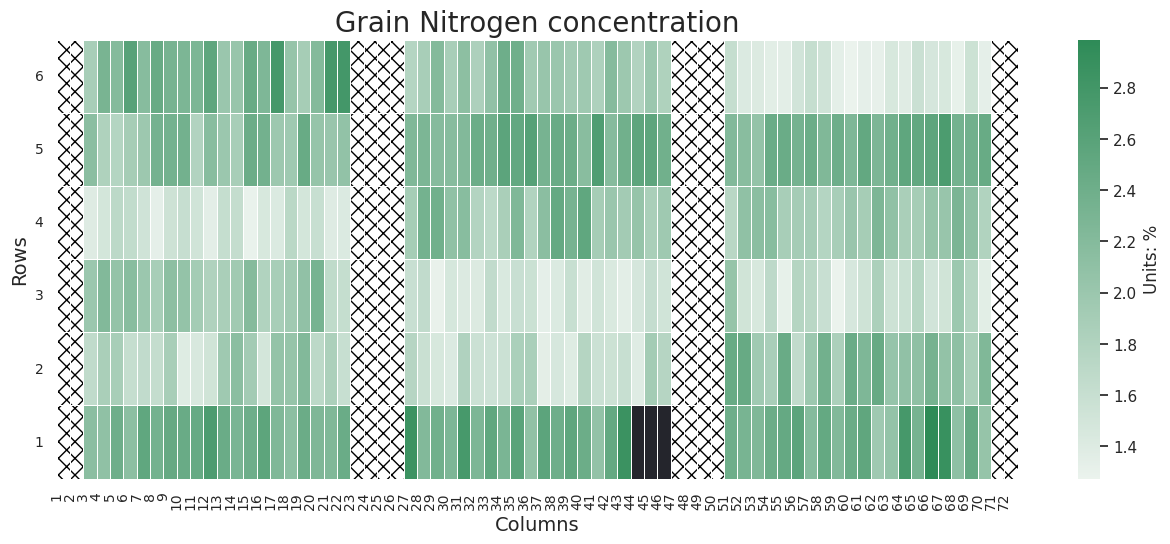

In [8]:
import nbimporter
from src.grassroots_requests import get_plot
from src.grassroots_plots    import seaborn_heatmap
json_study   = get_plot("603e3e9502700f7faf25dfb4") # WGIN Diversity Rothamsted Harvest 2019
grain_N_concentration = "GrnNCnc_Com_%"             # Selected observation for visualisation
colormap  ="seagreen"  #colormap ="xkcd:copper"
#colormap ="#a275ac"
seaborn_heatmap(json_study, colormap, grain_N_concentration) 

## Interactive heatmap using Plotly package

### Reuse matrices and show extra information 

In [11]:
import nbimporter
from src.grassroots_requests import get_plot
from src.grassroots_plots    import plotly_heatmap
json_study   = get_plot("603e3e9502700f7faf25dfb4") # WGIN Diversity Rothamsted Harvest 2019
grain_N_concentration = "GrnNCnc_Com_%"      # selected observation for visualisation
colormap = "Greens"    #"Hot"
#colormap = "Electric"  # "Rainbow"
plotly_heatmap(json_study, colormap, grain_N_concentration)

Remove: Anthesis time
Remove: Maturity time


## Even more interactive heatmap!

[https://grassroots.tools/heatmaps](https://grassroots.tools/heatmaps)



In [6]:
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

import dash_bootstrap_components as dbc          
from dash.exceptions import PreventUpdate        

#################################################
import json
import nbimporter
from src.grass_plots import get_all_fieldtrials     
from src.grass_plots import get_plot
from src.grass_plots import dict_phenotypes
from src.grass_plots import numpy_data
from src.grass_plots import treatments
from src.grass_plots import plotly_plot
import operator                                   
import numpy as np                               
import requests 
#################################################


all_studies  = get_all_fieldtrials()
all_studies = json.loads(all_studies)

studiesIDs = []
names      = []
for i in range(len(all_studies['results'][0]['results'])):
        uuid  = all_studies['results'][0]['results'][i]['data']['_id']['$oid']
        name = all_studies['results'][0]['results'][i]['data']['so:name']

        if 'phenotypes' in all_studies['results'][0]['results'][i]['data']:
            studiesIDs.append(uuid)
            names.append(name)

studiesIDs.remove('5dd8009ade68e75a927a8274')                #  faulty study. remove it from list for now
names.remove('1st vs 3rd wheat take-all resistance trial')   #


optionsNames = [{'label': names[i], 'value':studiesIDs[i]} for i in range(len(names))]

optionsNames.sort(key=operator.itemgetter('label'))         # Sort list of dictionaries by key 'label'

           
#app = Dash(__name__)
app = JupyterDash(__name__)  


app.layout = html.Div([

      html.Div(children=[
      html.Label(['List of studies:'],style={'font-weight': 'bold', "text-align": "left"}),

      dcc.Dropdown(id='DROPDOWN1',
          options = optionsNames,
          value   = optionsNames[0]['value'],
          searchable = True,
          style={'width':"100%"},
          #search_value='',
      ),
      html.Div(id='STUDY'),
      html.Br(),

    ]),
    
    html.Div(children=[
        html.Label(['Select phenotype:'],style={'font-weight': 'bold', "text-align": "left"}),
        
        dcc.Dropdown( id='DROPDOWN2',
              options = [],
              #value   = 'SpkPop_CalcGbSamp_m2', 
              searchable = True,
              style={'width':"100%"},
          )
    
    ]),

])
#-------------------------------------------------
@app.callback(
    Output('STUDY', 'children'),
    Input('DROPDOWN1', 'value')
)

def print_uuid(uuid):

    if uuid is None:
        raise PreventUpdate

    return ('Study uuid: {} '.format(uuid))

### **update dropdown 2 (List of phenotypes)** 
@app.callback(
    [Output('DROPDOWN2', 'options'),
     Output('DROPDOWN2', 'value') ],
     Input( 'DROPDOWN1', 'value') )

def update_dropdown_menu(uuid):

    if uuid is None:
        raise PreventUpdate

    single_study = get_plot(uuid)
    study_json   = json.loads(single_study)

    studies_ids =[]

    if 'phenotypes' in study_json['results'][0]['results'][0]['data']:
        studies_ids.append(uuid)
        #print("Study has phenotypes", studies_ids)


    plot_data         = study_json['results'][0]['results'][0]['data']['plots']
    phenotypes        = study_json['results'][0]['results'][0]['data']['phenotypes']

    dictTraits = dict_phenotypes(phenotypes, plot_data)

    phenoKeys   = list(dictTraits.keys())
    phenoValues = list(dictTraits.values())

    options = [{'label': phenoValues[i], 'value':phenoKeys[i]} for i in range(len(phenoKeys))]

    value   = list(dictTraits.keys())[0]
    return options, value



if __name__ == "__main__":
    app.run_server(mode='inline', port=8052)
    

Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
Remove: Anthesis time
Remove: Maturity time
